## 시계열 데이터
- 한글 헤더 읽기 EUC_KR

In [0]:
!curl -L https://bit.ly/2YpQu03 -o weather.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   145  100   145    0     0    960      0 --:--:-- --:--:-- --:--:--   960
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 78415  100 78415    0     0  88007      0 --:--:-- --:--:-- --:--:-- 1215k


In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
with open("weather.csv", "rt", encoding="EUC_KR") as fr:
    lines = fr.readlines()

In [0]:
lines[:10]

['저장한 날짜: 2017/10/24 11:09:57,,,\n',
 ',,,\n',
 ',서울,서울,서울\n',
 '연월일,평균기온,평균기온,평균기온\n',
 ',,품질정보,균질정보\n',
 '2006/1/1,3.6,8,1\n',
 '2006/1/2,4,8,1\n',
 '2006/1/3,3.7,8,1\n',
 '2006/1/4,4,8,1\n',
 '2006/1/5,3.6,8,1\n']

In [0]:
n_lines = ["연,월,일,기온,품질,균질\n"] + lines[5:]

In [0]:
n_lines[:10]

['연,월,일,기온,품질,균질\n',
 '2006/1/1,3.6,8,1\n',
 '2006/1/2,4,8,1\n',
 '2006/1/3,3.7,8,1\n',
 '2006/1/4,4,8,1\n',
 '2006/1/5,3.6,8,1\n',
 '2006/1/6,2.1,8,1\n',
 '2006/1/7,2.8,8,1\n',
 '2006/1/8,4.2,8,1\n',
 '2006/1/9,3.7,8,1\n']

In [0]:

n_lines = map(lambda v: v.replace('/', ','), n_lines)
result = "".join(n_lines).strip()

with open("new_data.csv", "wt", encoding="utf-8") as fw:
    fw.write(result)

In [0]:
import pandas as pd
df = pd.read_csv('new_data.csv', encoding="utf-8")
df.shape

(4018, 6)

In [0]:
df[:5]

,연,월,일,기온,품질,균질
0,2006,1,1,3.6,8,1
1,2006,1,2,4.0,8,1
2,2006,1,3,3.7,8,1
3,2006,1,4,4.0,8,1
4,2006,1,5,3.6,8,1


In [0]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [0]:
temp = df["기온"].values
train = temp[:3000]
test = temp[3000:]

In [0]:
def make_data(data, n_steps):
    x = []
    y = []
    for i in range(len(data)):
        if i > len(data) - n_steps - 1 : break
        x.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(x), np.array(y)

In [0]:
data = [1,2,3,4,5,6,7,8,9,10]
p,q = make_data(data,3)
p,q

(array([[1, 2, 3],
        [2, 3, 4],
        [3, 4, 5],
        [4, 5, 6],
        [5, 6, 7],
        [6, 7, 8],
        [7, 8, 9]]), array([ 4,  5,  6,  7,  8,  9, 10]))

In [0]:
n_steps = 10
train_x, train_y = make_data(train, n_steps)
test_x, test_y = make_data(test, n_steps)

In [0]:
len(train_x), len(test_x)

(2990, 1008)

In [0]:
len(train_y), len(test_y)

(2990, 1008)

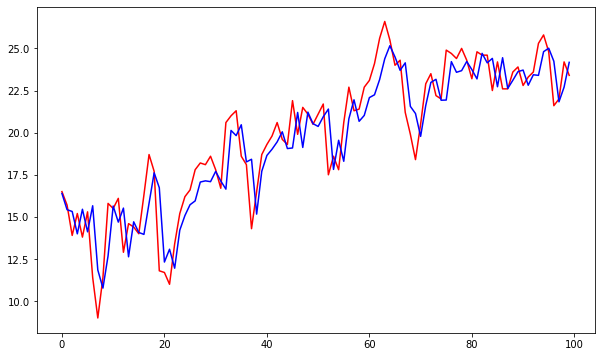

In [0]:
lr = LinearRegression(normalize=True)
lr.fit(train_x, train_y) 
pred_y = lr.predict(test_x)

# 결과를 그래프로 그리기
plt.figure(figsize=(10, 6))
plt.plot(test_y[:100], c='r')
plt.plot(pred_y[:100], c='b')
plt.show()

In [0]:
error = abs(pred_y  - test_y)
print("average=", error.mean())
print("max=", max(error))
lr.score(test_x, test_y)

average= 1.4992721234688688
max= 8.623504996019207


0.9353090415149158

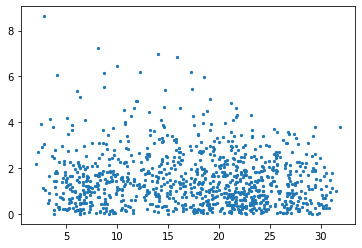

In [0]:
plt.scatter(test_y, error, s=5)

In [0]:
for i in range(1,21):
    train_x, train_y = make_data(train, i)
    test_x, test_y = make_data(test, i)
    lr = LinearRegression(normalize=True)
    lr.fit(train_x, train_y)
    print(i, lr.score(test_x, test_y).round(4))

1 0.9272
2 0.9277
3 0.9311
4 0.9321
5 0.9324
6 0.9337
7 0.934
8 0.9347
9 0.9348
10 0.9353
11 0.9353
12 0.9354
13 0.9353
14 0.9355
15 0.9354
16 0.9354
17 0.9357
18 0.9361
19 0.9361
20 0.9363


In [0]:
lr.coef_, lr.intercept_

(array([-0.03725084,  0.0213559 , -0.02011846,  0.03570072, -0.01240165,
         0.02224724,  0.01999889, -0.03923426,  0.04448252, -0.00849842,
         0.03080456,  0.03189909,  0.00978399,  0.04242895,  0.03157044,
         0.03886171,  0.00329653,  0.10826362, -0.15953233,  0.82341721]),
 0.2176709620460926)

## MLP 사용

In [0]:
n_steps = 365
train_x, train_y = make_data(train, n_steps)
test_x, test_y = make_data(test, n_steps)

In [0]:
from keras import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(200, activation='relu', input_shape=(n_steps,))) 
model.add(Dense(200, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_8 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 201       
Total params: 80,601
Trainable params: 80,601
Non-trainable params: 0
_________________________________________________________________


In [0]:
from sklearn.metrics import r2_score
model.fit(train_x, train_y, epochs=10, batch_size=50)
y_pred = model.predict(test_x, verbose=0)
r2_score(test_y, y_pred)

Epoch 1/10
2800/2800 [==============================] - 0s 64us/step - loss: 4.7221
Epoch 2/10
2800/2800 [==============================] - 0s 49us/step - loss: 4.2653
Epoch 3/10
2800/2800 [==============================] - 0s 52us/step - loss: 5.2119
Epoch 4/10
2800/2800 [==============================] - 0s 52us/step - loss: 4.5163
Epoch 5/10
2800/2800 [==============================] - 0s 52us/step - loss: 4.7032
Epoch 6/10
2800/2800 [==============================] - 0s 51us/step - loss: 4.9441
Epoch 7/10
2800/2800 [==============================] - 0s 52us/step - loss: 4.6530
Epoch 8/10
2800/2800 [==============================] - 0s 89us/step - loss: 4.3299
Epoch 9/10
2800/2800 [==============================] - 0s 82us/step - loss: 4.0286
Epoch 10/10
2800/2800 [==============================] - 0s 52us/step - loss: 4.2190


0.8739857123663374

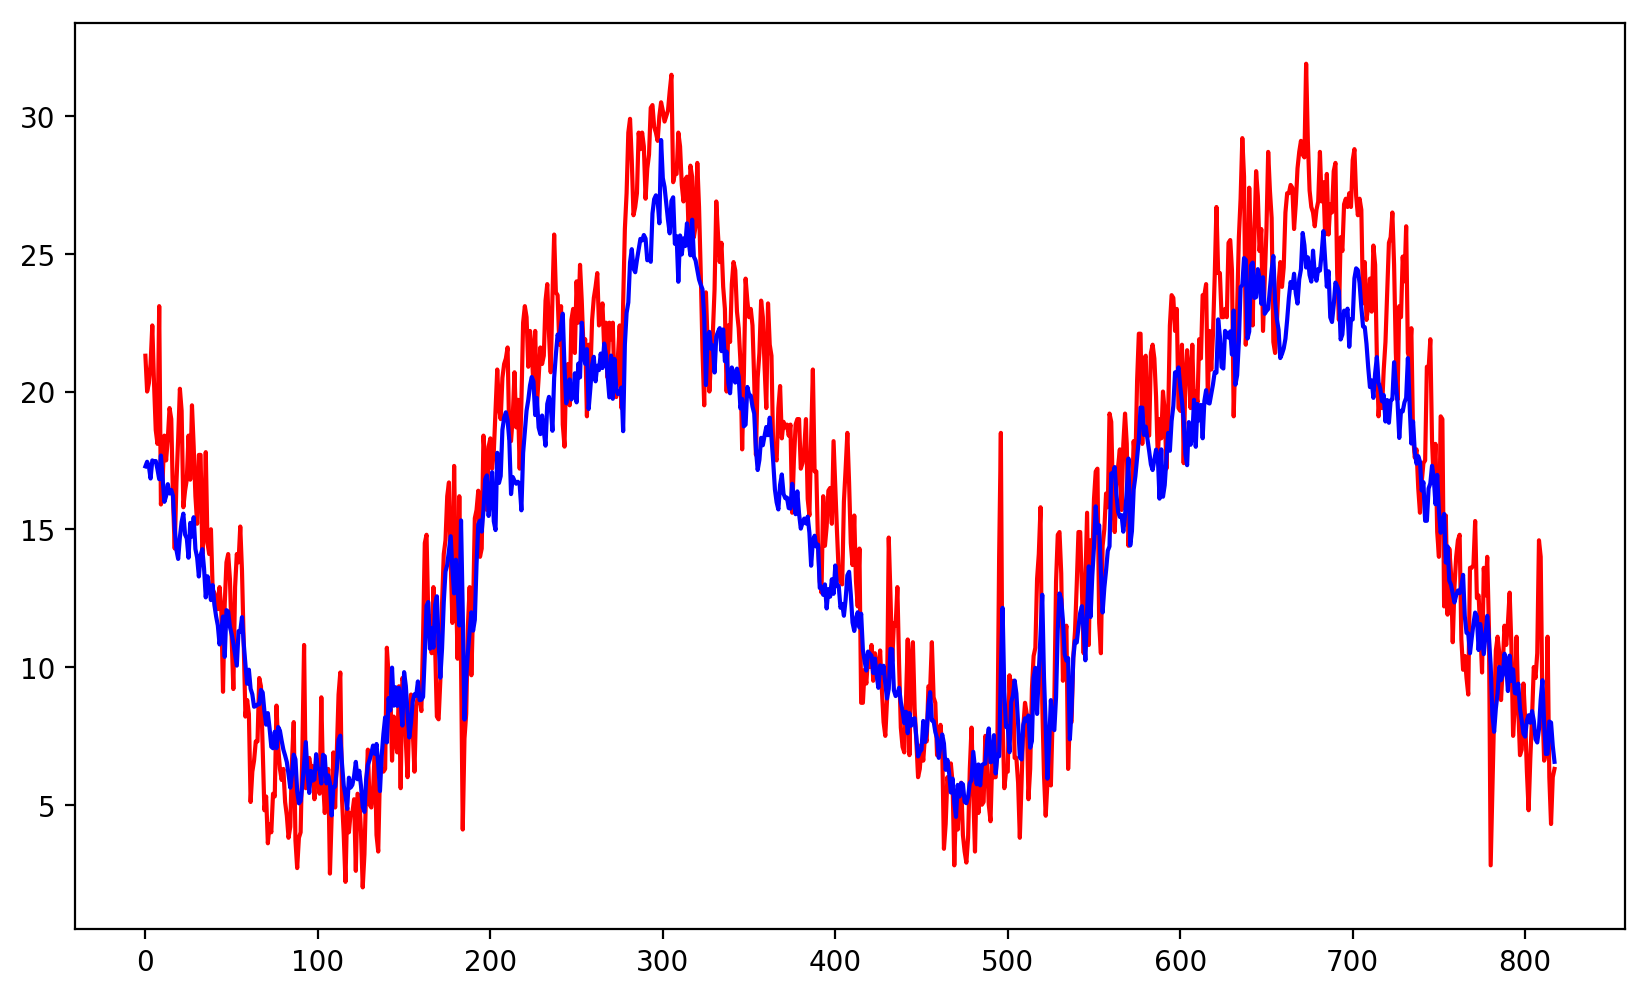

In [0]:
plt.figure(figsize=(10, 6), dpi=200)
plt.plot(test_y, c='r')
plt.plot(y_pred, c='b')
plt.show()

In [0]:
model
